# Investigate The FBI Gun Dataset

## Table of content
<ul>
    <li><a href="#Introduction">Introduction</a></li>
     <li><a href="#Data Wrangling">Data Wrangling</a></li>
     <li><a href="#Exploratory Data Analysis">Exploratory Data Analysis</a></li>
     <li><a href="#Conclusions">Conclusions</a></li>
</ul>

<a id="Introduction"></a>
## Introduction

> **Key notes**: The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from [census.gov](https://www.census.gov/).

> The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.

> The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.

> **Questions to explore**: 
><ol>
><li><a href="#q1">  The highest purchages record happened in which state for the persons under 18 years, percent on April 1, 2010?</a></li>
><li><a href="#q2">  What census data is most associated with high gun per capita?</a></li>
><li><a href="#q3">  Which states have had the highest growth in gun registrations?</a></li>
><li><a href="#q4">  What is the overall trend of gun purchases?</a></li>
><li><a href="#q5">  What type of gun has highest quantity, and the relationship to totals?</a></li>
><li><a href="#q6">  What is the sum of registered gun in each state over time?</a></li>
</ol>

In [98]:
#Set up import statment for all packages that are planed to use.
#Include a 'magic word' so that the visulaisations are polted.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='Data Wrangling'></a>
## Data Wrangling
**This section contains the following:**
><ul>
><li>Loading the data.</li>
><li>Exploring the data general properties.</li>
><li>Trim and clean the dataset for analysis.</li>
></ul>    

In [99]:
#Loading the data into the DataFarme.
df =pd.read_csv("U.S. Census Data.csv",sep=',')
df1 =pd.read_csv("gun_data.csv",sep=',')

### U.S. Census Data:

In [100]:
#call on datafame to display a few rows.
df.head(5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [101]:
#return atuple of the fimention of the data frame.
df.shape

(85, 52)

In [102]:
#display a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [103]:
#counting the hole numper of duplicated values in the data frame.
df.duplicated().sum()

3

In [104]:
#selecting the rws with the nan values.
df_dup=df[df.duplicated()]
df_dup

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# drop all duplicated values in the entire dataframe.
# Confirm changes
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [106]:
#check for nan values in which column. 
df.isnull().any()

Fact              True
Fact Note         True
Alabama           True
Alaska            True
Arizona           True
Arkansas          True
California        True
Colorado          True
Connecticut       True
Delaware          True
Florida           True
Georgia           True
Hawaii            True
Idaho             True
Illinois          True
Indiana           True
Iowa              True
Kansas            True
Kentucky          True
Louisiana         True
Maine             True
Maryland          True
Massachusetts     True
Michigan          True
Minnesota         True
Mississippi       True
Missouri          True
Montana           True
Nebraska          True
Nevada            True
New Hampshire     True
New Jersey        True
New Mexico        True
New York          True
North Carolina    True
North Dakota      True
Ohio              True
Oklahoma          True
Oregon            True
Pennsylvania      True
Rhode Island      True
South Carolina    True
South Dakota      True
Tennessee  

In [107]:
#counting the hole numper of NAN values in the entire dataframe.
df.isnull().sum().sum()

906

In [108]:
# Checking useless rows in the census dataset inferred using info() & isnull() methods.
df.iloc[65:,:]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Fact Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,(a),Includes persons reporting only one race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,(b),"Hispanics may be of any race, so also are incl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,(c),Economic Census - Puerto Rico data are not com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,Value Flags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,-,Either no or too few sample observations were ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
#looking for all rows contain NAN values.
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN 

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# generats some helpful descriptive statistics.
df.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,Native Hawaiian and Other Pacific Islander alo...,(c),13.80%,7.30%,50.30%,50.90%,6.80%,3.30%,5.70%,51.60%,...,814195,0.048,50.40%,2.50%,1.90%,10.10%,"""53""",1.50%,1.60%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [111]:
# Change column name in df1 into lower case for the convenience of analysis
# Confirm changes
df.rename(columns = lambda x: x.lower(), inplace = True)
df.columns

Index(['fact', 'fact note', 'alabama', 'alaska', 'arizona', 'arkansas',
       'california', 'colorado', 'connecticut', 'delaware', 'florida',
       'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas',
       'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts',
       'michigan', 'minnesota', 'mississippi', 'missouri', 'montana',
       'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico',
       'new york', 'north carolina', 'north dakota', 'ohio', 'oklahoma',
       'oregon', 'pennsylvania', 'rhode island', 'south carolina',
       'south dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia',
       'washington', 'west virginia', 'wisconsin', 'wyoming'],
      dtype='object')

In [112]:
# As the NaN values are of string type therefore thty can't treated by filling with means 
# since they don't affect the arithmetic calculation nor satistical analysis
# so it is better to replace those NaN values with a common string type value which doesn't indicate anything
# For the numerical type of NaN, as each row has specific meaning, thus we can't fill them with mean

# As for df, numericial type of data was mispresented as string type, thus first task is to convert them into float
# Skip the first 2 columns as they should be string type, so leave them unchanged

columns = df.iloc[:,2:].columns
for col in columns:
    df[col] = df[col].str.extract('(\d+)').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fact            80 non-null     object 
 1   fact note       28 non-null     object 
 2   alabama         65 non-null     float64
 3   alaska          64 non-null     float64
 4   arizona         65 non-null     float64
 5   arkansas        65 non-null     float64
 6   california      65 non-null     float64
 7   colorado        65 non-null     float64
 8   connecticut     65 non-null     float64
 9   delaware        65 non-null     float64
 10  florida         65 non-null     float64
 11  georgia         65 non-null     float64
 12  hawaii          64 non-null     float64
 13  idaho           65 non-null     float64
 14  illinois        65 non-null     float64
 15  indiana         65 non-null     float64
 16  iowa            65 non-null     float64
 17  kansas          65 non-null     float

In [113]:
# Replace the all NaN in df with 'No Record' 
df.fillna('No record', inplace = True)
# Confirm changes 
df.isnull().any()

fact              False
fact note         False
alabama           False
alaska            False
arizona           False
arkansas          False
california        False
colorado          False
connecticut       False
delaware          False
florida           False
georgia           False
hawaii            False
idaho             False
illinois          False
indiana           False
iowa              False
kansas            False
kentucky          False
louisiana         False
maine             False
maryland          False
massachusetts     False
michigan          False
minnesota         False
mississippi       False
missouri          False
montana           False
nebraska          False
nevada            False
new hampshire     False
new jersey        False
new mexico        False
new york          False
north carolina    False
north dakota      False
ohio              False
oklahoma          False
oregon            False
pennsylvania      False
rhode island      False
south carolina  

### gun_data:

In [114]:
#call on datafame to display a few rows.
df1.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [115]:
#return atuple of the fimention of the data frame.
df1.shape

(12485, 27)

In [116]:
#display a concise summary of the dataframe.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [117]:
#counting the hole numper of duplicated values in the data frame.
df1.duplicated().sum()

0

In [118]:
#check for nan values in which column. 
df1.isnull().any()

month                        False
state                        False
permit                        True
permit_recheck                True
handgun                       True
long_gun                      True
other                         True
multiple                     False
admin                         True
prepawn_handgun               True
prepawn_long_gun              True
prepawn_other                 True
redemption_handgun            True
redemption_long_gun           True
redemption_other              True
returned_handgun              True
returned_long_gun             True
returned_other                True
rentals_handgun               True
rentals_long_gun              True
private_sale_handgun          True
private_sale_long_gun         True
private_sale_other            True
return_to_seller_handgun      True
return_to_seller_long_gun     True
return_to_seller_other        True
totals                       False
dtype: bool

In [119]:
#counting the hole numper of NAN values in the entire dataframe.
df1.isnull().sum().sum()

154595

In [120]:
#looking for all rows contain NAN values.
is_NaN1 = df.isnull()
row_has_NaN1 = is_NaN1.any(axis=1)
rows_with_NaN1 = df[row_has_NaN1]
rows_with_NaN1 

,fact,fact note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming


In [121]:
# generats some helpful descriptive statistics.
df1.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [122]:
# Change column name in df1 into lower case for the convenience of analysis
# Confirm changes
df1.rename(columns = lambda x: x.lower(), inplace = True)
df1.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [123]:
# Convert string into datatime format in df1.
df1.month = pd.to_datetime(df1["month"],  errors="coerce")
# Confirm changes
df1.dtypes

month                        datetime64[ns]
state                                object
permit                              float64
permit_recheck                      float64
handgun                             float64
long_gun                            float64
other                               float64
multiple                              int64
admin                               float64
prepawn_handgun                     float64
prepawn_long_gun                    float64
prepawn_other                       float64
redemption_handgun                  float64
redemption_long_gun                 float64
redemption_other                    float64
returned_handgun                    float64
returned_long_gun                   float64
returned_other                      float64
rentals_handgun                     float64
rentals_long_gun                    float64
private_sale_handgun                float64
private_sale_long_gun               float64
private_sale_other              

<a id='Exploratory Data Analysis'></a>
## Exploratory Data Analysis

<a id="q1"></a>
 ### The highest purchages record happened in which state for the persons under 18 years, percent on April 1, 2010.

In [124]:
# print out a few rows of the data.
df.head(20)

,fact,fact note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",No record,4.0,741.0,6.0,2.0,39.0,5.0,3.0,952.0,...,865454.0,6651194.0,27.0,3.0,624.0,8.0,7.0,1.0,5.0,585.0
1,"Population estimates base, April 1, 2010, (V2...",No record,4.0,710.0,6.0,2.0,37.0,5.0,3.0,897.0,...,814195.0,6346298.0,25.0,2.0,625.0,8.0,6.0,1.0,5.0,563.0
2,"Population, percent change - April 1, 2010 (es...",No record,1.0,4.0,8.0,2.0,5.0,10.0,0.0,6.0,...,0.0,0.0,10.0,10.0,0.0,5.0,8.0,1.0,1.0,3.0
3,"Population, Census, April 1, 2010",No record,4.0,710.0,6.0,2.0,37.0,5.0,3.0,897.0,...,814180.0,6346105.0,25.0,2.0,625.0,8.0,6.0,1.0,5.0,563.0
4,"Persons under 5 years, percent, July 1, 2016, ...",No record,6.0,7.0,6.0,6.0,6.0,6.0,5.0,5.0,...,0.0,0.0,7.0,8.0,4.0,6.0,6.0,5.0,5.0,6.0
5,"Persons under 5 years, percent, April 1, 2010",No record,6.0,7.0,7.0,6.0,6.0,6.0,5.0,6.0,...,0.0,0.0,7.0,9.0,5.0,6.0,6.0,5.0,6.0,7.0
6,"Persons under 18 years, percent, July 1, 2016,...",No record,22.0,25.0,23.0,23.0,23.0,22.0,21.0,21.0,...,0.0,0.0,26.0,30.0,19.0,22.0,22.0,20.0,22.0,23.0
7,"Persons under 18 years, percent, April 1, 2010",No record,23.0,26.0,25.0,24.0,25.0,24.0,22.0,22.0,...,0.0,0.0,27.0,31.0,20.0,23.0,23.0,20.0,23.0,24.0
8,"Persons 65 years and over, percent, July 1, 2...",No record,16.0,10.0,16.0,16.0,13.0,13.0,16.0,17.0,...,0.0,0.0,12.0,10.0,18.0,14.0,14.0,18.0,16.0,15.0
9,"Persons 65 years and over, percent, April 1, 2010",No record,13.0,7.0,13.0,14.0,11.0,10.0,14.0,14.0,...,0.0,0.0,10.0,9.0,14.0,12.0,12.0,16.0,13.0,12.0


In [125]:
# print the index of the max value, as .idxmax() doesn't work properly :(
df_line = pd.DataFrame(df.iloc[7,2:]) 
df_line[df_line[7]==df_line[7].max()]


,7
utah,31.0


> **Utah** state had the highest purchages record for persons under 18 years, percent on April 1, 2010, and the percent is 31.

<a id="q2"></a>
### The census data is most associated with high gun per capita.

In [126]:
df.head()

,fact,fact note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",No record,4.0,741.0,6.0,2.0,39.0,5.0,3.0,952.0,...,865454.0,6651194.0,27.0,3.0,624.0,8.0,7.0,1.0,5.0,585.0
1,"Population estimates base, April 1, 2010, (V2...",No record,4.0,710.0,6.0,2.0,37.0,5.0,3.0,897.0,...,814195.0,6346298.0,25.0,2.0,625.0,8.0,6.0,1.0,5.0,563.0
2,"Population, percent change - April 1, 2010 (es...",No record,1.0,4.0,8.0,2.0,5.0,10.0,0.0,6.0,...,0.0,0.0,10.0,10.0,0.0,5.0,8.0,1.0,1.0,3.0
3,"Population, Census, April 1, 2010",No record,4.0,710.0,6.0,2.0,37.0,5.0,3.0,897.0,...,814180.0,6346105.0,25.0,2.0,625.0,8.0,6.0,1.0,5.0,563.0
4,"Persons under 5 years, percent, July 1, 2016, ...",No record,6.0,7.0,6.0,6.0,6.0,6.0,5.0,5.0,...,0.0,0.0,7.0,8.0,4.0,6.0,6.0,5.0,5.0,6.0


<a id="q3"></a>
### The states have had the highest growth in gun registrations.

In [127]:
df.head()

,fact,fact note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",No record,4.0,741.0,6.0,2.0,39.0,5.0,3.0,952.0,...,865454.0,6651194.0,27.0,3.0,624.0,8.0,7.0,1.0,5.0,585.0
1,"Population estimates base, April 1, 2010, (V2...",No record,4.0,710.0,6.0,2.0,37.0,5.0,3.0,897.0,...,814195.0,6346298.0,25.0,2.0,625.0,8.0,6.0,1.0,5.0,563.0
2,"Population, percent change - April 1, 2010 (es...",No record,1.0,4.0,8.0,2.0,5.0,10.0,0.0,6.0,...,0.0,0.0,10.0,10.0,0.0,5.0,8.0,1.0,1.0,3.0
3,"Population, Census, April 1, 2010",No record,4.0,710.0,6.0,2.0,37.0,5.0,3.0,897.0,...,814180.0,6346105.0,25.0,2.0,625.0,8.0,6.0,1.0,5.0,563.0
4,"Persons under 5 years, percent, July 1, 2016, ...",No record,6.0,7.0,6.0,6.0,6.0,6.0,5.0,5.0,...,0.0,0.0,7.0,8.0,4.0,6.0,6.0,5.0,5.0,6.0


<a id="q3"></a>
### The state that have had the highest growth in gun registrations.

In [128]:
# Groupby time, state and sum of totals
gun_data_of_alltime = df1.groupby(['month', 'state'])['totals'].sum()


In [129]:
# Find out the earliest and latest registration date
earliest_data = df1["month"].min()
latest_data = df1["month"].max() 

In [130]:
# The amount of registed guns from lastest substract the earliest
gun_grow_tot =  gun_data_of_alltime.loc[latest_data] - gun_data_of_alltime.loc[earliest_data]


In [131]:
#Fined the index of the max value.
gun_grow_tot.idxmax(axis=0, skipna=True)

'Kentucky'

> 'kentucky' have had the highest growth in gun registrations over time.

<a id="q4"></a>
### The overall trend of gun purchases.

In [132]:
#grouping the date and the total numper of gun checks.
Gun_prechase_trend =df1.groupby(["month"])["totals"].sum()


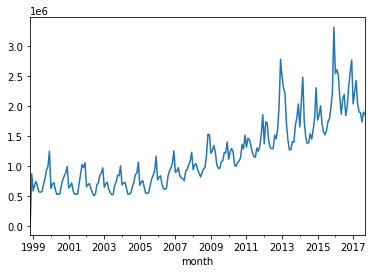

In [133]:
#the plot of gun perchase relations
Gun_prechase_trend.plot(kind ="line");

>The over all trend in increasing and becomming faster over time.

<a id ="q5"></a>
### The type of gun that has the highest quantity, and the relationship to totals.

In [134]:
# select the guns columns
guns_df = df1.loc[:,['permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun']]


In [135]:
#total numper of each kind of guns.
gun_highest_quantity = guns_df.sum()


In [136]:
#The type of gun that has the highest quantity
gun_highest_quantity.idxmax()

'long_gun'

In [137]:
#the value of the highest quantity
gun_highest_quantity.max()

97370026.0

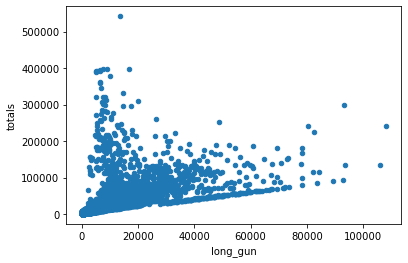

In [138]:
#The corolation betwen the highest quantity and the total numper of checks. 
df1.plot(kind = "scatter" ,x ="long_gun", y = "totals");

> Long gun is highest registed type of gun in number among the others, it is positively correlated with totals.

<a id="q6"></a>
### The sum of registered gun in each state over time.

In [139]:
#grouping the total numper of gun checks per state.
guns_per_state =pd.DataFrame(df1.groupby("state")["totals"].sum())

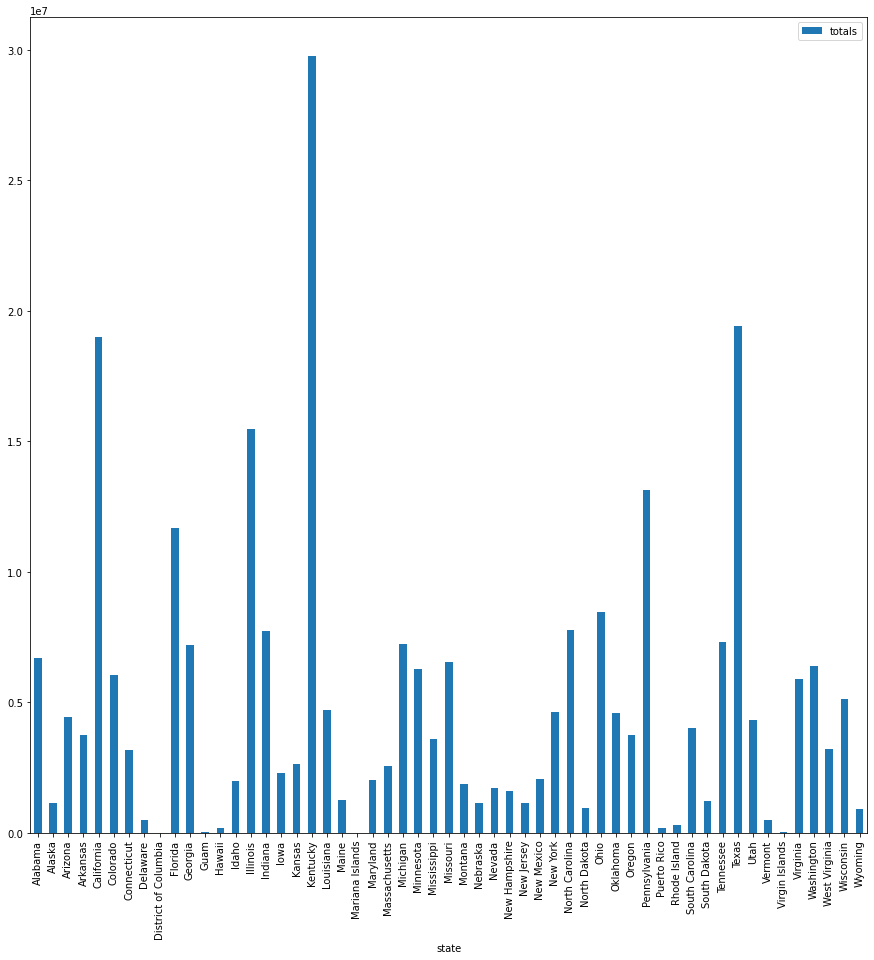

In [140]:
#ploting the total numper of gun checks per state. 
guns_per_state.plot(kind ="bar",figsize=(15,15));

<a id="Conclusions"></a>
### Conclusion

> In the current study,a good amount of perfound analysis has been carried out.Prior to each step,prior to each step,detailed instructions was given and interpretations were provided afterwards.the  data set included two tables, the data was ranged from 1998 to 2017,which consested of detailed information on regestration gunsbased on substin, the analysis would be more reliable opposed to more small_scale analysis.